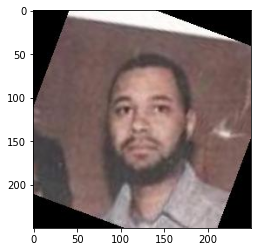

(250, 250, 3)


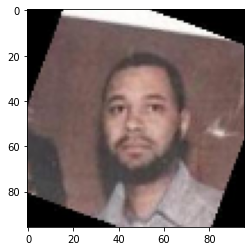

(96, 96, 3)


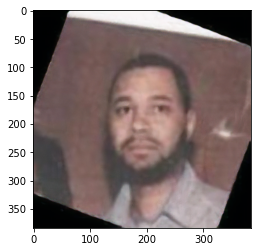

(384, 384, 3)
channels_last


In [43]:
from keras.models import load_model
from keras.backend import image_data_format
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import numpy as np
model=load_model('models/generator.h5')
img1="Aaron_Patterson_0001.jpg"
img1 = mpimg.imread(img1)
plt.imshow(img1)
plt.show()
print(img1.shape)
img=cv2.resize(img1,(96,96))
plt.imshow(img)
plt.show()
print(img.shape)
low_res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Rescale to 0-1.
low_res = low_res / 255.0

        # Get super resolution image
sr = model.predict(np.expand_dims(low_res, axis=0))[0]

        # Rescale values in range 0-255
sr = (((sr + 1) / 2.) * 255).astype(np.uint8)

        # Convert back to BGR for opencv
sr = cv2.cvtColor(sr, cv2.COLOR_RGB2BGR)
plt.imshow(sr)
plt.show()
print(sr.shape)
print(image_data_format())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


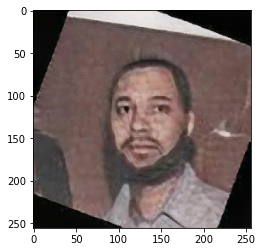

In [44]:
from model1 import generator_model
from utils1 import load_image, deprocess_image, preprocess_image



g = generator_model()
g.load_weights('generator.h5')
cv_img = cv2.cvtColor(sr, cv2.COLOR_BGR2RGB)
#print(cv_img)
cv_img = cv2.resize(cv_img,(256,256))
cv_img=np.expand_dims(cv_img,axis=0)
#img = np.array(cv_img)
img = cv_img/255
generated_image = g.predict(img)
generated_image=generated_image.reshape((256,256,3))
#deblur = generated_image * 127.5 + 127.5
deblur=(((generated_image+1)/2)*255).astype(np.uint8)
deblur=cv2.cvtColor(generated_image,cv2.COLOR_RGB2BGR)
plt.imshow(deblur,vmin=0,vmax=1)
plt.show()